# Project #3
## Foundations of Machine Learning

The purpose of this project is to build models to predict the outcome of the 2024 presidential election in Virginia and provide quantitative information about the precision of the prediction.
  
The data include:
  
  - `voting_VA.csv`: Voting data for presidential elections for Virginia from 2000 to 2020
  - `nhgis_county_data`: A folder containing many county-level summary stats for every county in the U.S. This is the most complete county-level data I could find. If you go to the IPUMS NHGIS web site, you can see what else is available (there are hundreds of variables, and I chose a large number of obvious ones; perhaps some useful ones escaped my attention). For standard IPUMS microdata, the county is not available for privacy reasons.
  - `county_adjacencies.csv`: I looked up the neighbors, districts, FIPS county identifiers, and populations in 2022 for all counties and cities in Virginia.
  - At [https://vgin.vdem.virginia.gov/datasets/777890ecdb634d18a02eec604db522c6/about] there is a shapefile for making choropleth plots called "Shapefile Download (Clipped to VIMS shoreline)"
  -  I put together a starter notebook called `va_voting.ipynb` that shows how to combine these files and make nice maps

You can use whatever additional data you want to create a predictive algorithm for outcomes, based on the `voting_VA.csv` and `nhgis_county_data` data or other sources you think would be useful. You can focus on Virginia data, but in principle, you could use data from the entire country. Since you only have five observations for each county on its own in Virginia, you can, in principle, use the additional data about county composition or data from other states to build richer and more powerful predictive models than just the sample average for each county (e.g 3 observations of `D` winning and 2 of `R` winning implies a probability 3/5 of `D` winning). You could also gather and use data about past candidates to see if there are county-candidate interaction effects that improve your model's performance. Indeed, 2024 might be a Biden-Trump rematch, in which case past data might be extremely relevant.
    
## Paper format

The format of the paper should be:

- Summary: A one paragraph description of the question, methods, and results (about 350 words).
- Data: One to two pages discussing the data and key variables, and any challenges in reading, cleaning, and preparing them for analysis.
- Results: Two to five pages providing visualizations, statistics, tables, a discussion of your methodology, and a presentation of your main results. In particular, how are you approaching the prediction problem? How confident are you about your assessments that counties will support one party or the other?
- Conclusion: One to two pages summarizing the project, defending it from criticism, and suggesting additional work that was outside the scope of the project.
- Appendix: If you have a significant number of additional plots or table that you feel are essential to the project, you can put any amount of extra content at the end and reference it from the body of the paper.

Submit your work in your group's GitHub repo.

## Group Work and Submission

Each group will submit their work in a GitHub repo. The repo can be managed by a group member or arranged by github.com/DS3001.

Half of each student's grade is based on their commits to the repo. Each student is expected to do something
specific that contributes to the overall project outcome. Since commits are recorded explicitly by Git/GitHub,
this is observable. A student can contribute by cleaning data, creating visualizations, or writing about results,
but everyone has to do something substantial. A student's work doesn't need to make it into the final report
to be valuable and substantial, and fulfill the requirement to make a contribution to the project.

The other half of each student's grade is based on the report. Groups will work together on combining
results and writing up findings in a Jupyter notebook, using code chunks to execute Python commands and
markdown chunks to structure the paper and provide exposition. The notebook should run on Colab or
Rivana from beginning to end without any errors.

## Criteria

The project is graded based on four criteria:

- Project Concept: What is the strategy for building and testing the group's predictive models? How are the models embedded in the decision problem of gerrymandering Virginia?  
- Wrangling, EDA, and Visualization: How are are missing values handled? For variables with large numbers of missing values, to what extent do the data and documentation provide an explanation for the missing data? If multiple data sources are used, how are the data merged? For the main variables in the analysis, are the relevant data summarized and visualized through a histogram or kernel density plot where appropriate? Are basic quantitative features of the data addressed and explained? How are outliers characterized and addressed?
- Analysis: What are the groups' main findings? Do the tables, plots, and statistics support the conclusions? If the gerrymandering strategy succeeds, what are the results and how extreme can the map be drawn for each side? If the gerrymandering strategy fails, is there a thoughtful discussion about the challenges and limitations?
- Replication/Documentation: Is the code appropriately commented? Can the main results be replicated from the code and original data files? Are significant choices noted and explained?

Each of the four criteria are equally weighted (25 points out of 100).


# EDA of voting_VA data


In [422]:
!git clone https://github.com/DS3001/project_voting

fatal: destination path 'project_voting' already exists and is not an empty directory.


In [423]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [424]:
# read in csv files

voting_VA = pd.read_csv("./project_voting/data/voting_VA.csv")
county_adjacencies = pd.read_csv("./project_voting/data/county_adjacencies.csv")

In [425]:
voting_VA

# Dropping the following:
# Unamed: 0, state, state_po, version

cleaned_voting_VA = voting_VA.drop(columns=['Unnamed: 0', 'state', 'state_po', 'version'])

In [426]:
cleaned_voting_VA

,year,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,mode
0,2000,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,TOTAL
1,2000,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,TOTAL
2,2000,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,TOTAL
3,2000,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,TOTAL
4,2000,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,TOTAL
...,...,...,...,...,...,...,...,...,...
3731,2020,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,24,12113,ELECTION DAY
3732,2020,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,0,12113,PROVISIONAL
3733,2020,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2825,12113,ABSENTEE
3734,2020,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2370,12113,ELECTION DAY


In [427]:
county_adjacencies

,County,Population2022,FIPS,District,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
0,Accomack,33191,51001,2,Northumberland,Lancaster,Middlesex,Mathews,Northampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albemarle,114534,51003,5,CharlottesvilleCity,Nelson,Augusta,Rockingham,Greene,Orange,Louisa,Fluvanna,Buckingham,Nelson,NaN,NaN
2,AlexandriaCity,155525,51510,8,Fairfax,Arlington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alleghany,14835,51005,6,Craig,Bath,Botetourt,CovingtonCity,Rockbridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amelia,13455,51007,5,PrinceEdward,Cumberland,Powhatan,Chesterfield,Dinwiddie,Nottoway,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,WinchesterCity,27936,51840,6,Frederick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,Wise,35421,51195,9,Lee,Scott,Dickenson,NortonCity,Russell,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,Wythe,28111,51197,9,Bland,Smyth,Grayson,Carroll,Pulaski,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,York,71341,51199,1,Gloucester,JamesCty,WilliamsburgCity,NewportNewsCity,PoquosonCity,HamptonCity,Northampton,NaN,NaN,NaN,NaN,NaN


In [428]:
print(voting_VA.shape)
print(voting_VA.info())
voting_VA.describe()

(3736, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3736 entries, 0 to 3735
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      3736 non-null   int64 
 1   year            3736 non-null   int64 
 2   state           3736 non-null   object
 3   state_po        3736 non-null   object
 4   county_name     3736 non-null   object
 5   county_fips     3736 non-null   int64 
 6   office          3736 non-null   object
 7   candidate       3736 non-null   object
 8   party           3736 non-null   object
 9   candidatevotes  3736 non-null   int64 
 10  totalvotes      3736 non-null   int64 
 11  version         3736 non-null   int64 
 12  mode            3736 non-null   object
dtypes: int64(6), object(7)
memory usage: 379.6+ KB
None


,Unnamed: 0,year,county_fips,candidatevotes,totalvotes,version
count,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.0
mean,47061.027837,2012.826552,51264.579229,5878.282120,29116.353587,20220315.0
std,23219.785408,7.589036,270.546458,18452.435802,58562.057257,0.0
min,11161.000000,2000.000000,51001.000000,0.000000,0.000000,20220315.0
25%,21235.750000,2004.000000,51069.000000,59.000000,6741.500000,20220315.0
50%,49016.500000,2016.000000,51139.000000,899.000000,11629.000000,20220315.0
75%,71036.250000,2020.000000,51550.000000,4548.250000,24520.750000,20220315.0
max,71970.000000,2020.000000,51840.000000,355133.000000,601243.000000,20220315.0


In [429]:
print(county_adjacencies.shape)
print(county_adjacencies.info())
county_adjacencies.describe()

(133, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   County          133 non-null    object
 1   Population2022  133 non-null    int64 
 2   FIPS            133 non-null    int64 
 3   District        133 non-null    int64 
 4   N1              133 non-null    object
 5   N2              119 non-null    object
 6   N3              104 non-null    object
 7   N4              99 non-null     object
 8   N5              83 non-null     object
 9   N6              59 non-null     object
 10  N7              33 non-null     object
 11  N8              17 non-null     object
 12  N9              10 non-null     object
 13  N10             4 non-null      object
 14  N11             1 non-null      object
 15  N12             1 non-null      object
dtypes: int64(3), object(13)
memory usage: 16.8+ KB
None


,Population2022,FIPS,District
count,1.330000e+02,133.000000,133.000000
mean,6.529045e+04,51263.992481,5.684211
std,1.280884e+05,271.883038,2.788962
min,2.301000e+03,51001.000000,1.000000
25%,1.465200e+04,51069.000000,4.000000
50%,2.610900e+04,51139.000000,6.000000
75%,5.438100e+04,51550.000000,9.000000
max,1.138331e+06,51840.000000,11.000000


In [430]:
Q1 = cleaned_voting_VA['candidatevotes'].quantile(0.25)
Q3 = cleaned_voting_VA['candidatevotes'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = cleaned_voting_VA[(cleaned_voting_VA['candidatevotes'] < lower_bound) | (cleaned_voting_VA['candidatevotes'] > upper_bound)]

print("Number of outliers:", outliers.shape[0])

Number of outliers: 416


## Identified outliers but decided not to filter them out

In [431]:
print('Missing voting_VA Values')
print(voting_VA.isnull().sum(), '\n')

print('Missing County_adjacencies Values')
print(county_adjacencies.isnull().sum())

Missing voting_VA Values
Unnamed: 0        0
year              0
state             0
state_po          0
county_name       0
county_fips       0
office            0
candidate         0
party             0
candidatevotes    0
totalvotes        0
version           0
mode              0
dtype: int64 

Missing County_adjacencies Values
County              0
Population2022      0
FIPS                0
District            0
N1                  0
N2                 14
N3                 29
N4                 34
N5                 50
N6                 74
N7                100
N8                116
N9                123
N10               129
N11               132
N12               132
dtype: int64


## No need to deal with missing values for voting_VA. Need to figure out how to deal with null values for county_adjacencies. Will encode values to remove NAs.


In [432]:
# Fill missing values with a placeholder
one_hot_encoding = county_adjacencies.copy()
one_hot_encoding.fillna("None", inplace=True)

# One-hot encode the N columns
df_encoded = pd.get_dummies(one_hot_encoding, columns=['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N12'])

# Display the encoded dataframe
df_encoded

,County,Population2022,FIPS,District,N1_Accomack,N1_Albemarle,N1_Alleghany,N1_Amelia,N1_Amherst,N1_Appomattox,...,N9_VirginiaBeachCity,N10_HamptonCity,N10_Henrico,N10_KingWilliam,N10_Nelson,N10_None,N11_Gloucester,N11_None,N12_None,N12_York
0,Accomack,33191,51001,2,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
1,Albemarle,114534,51003,5,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
2,AlexandriaCity,155525,51510,8,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
3,Alleghany,14835,51005,6,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
4,Amelia,13455,51007,5,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,WinchesterCity,27936,51840,6,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
129,Wise,35421,51195,9,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
130,Wythe,28111,51197,9,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
131,York,71341,51199,1,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False


In [433]:
print(voting_VA['county_name'].value_counts(), '\n')
print(voting_VA['party'].value_counts(), '\n')
print(voting_VA['candidate'].value_counts(), '\n')

county_name
FAIRFAX              44
RICHMOND             44
ROANOKE              44
FRANKLIN             44
BEDFORD              44
                     ..
GALAX CITY           12
HAMPTON CITY         12
HARRISONBURG CITY    12
WINCHESTER CITY      12
NORTON CITY           8
Name: count, Length: 167, dtype: int64 

party
DEMOCRAT       1068
REPUBLICAN     1068
OTHER          1068
LIBERTARIAN     398
GREEN           134
Name: count, dtype: int64 

candidate
OTHER                1068
JOSEPH R BIDEN JR     398
JO JORGENSEN          398
DONALD J TRUMP        398
GEORGE W. BUSH        268
BARACK OBAMA          268
AL GORE               134
RALPH NADER           134
JOHN KERRY            134
JOHN MCCAIN           134
MITT ROMNEY           134
HILLARY CLINTON       134
DONALD TRUMP          134
Name: count, dtype: int64 



# Visualizing results so far

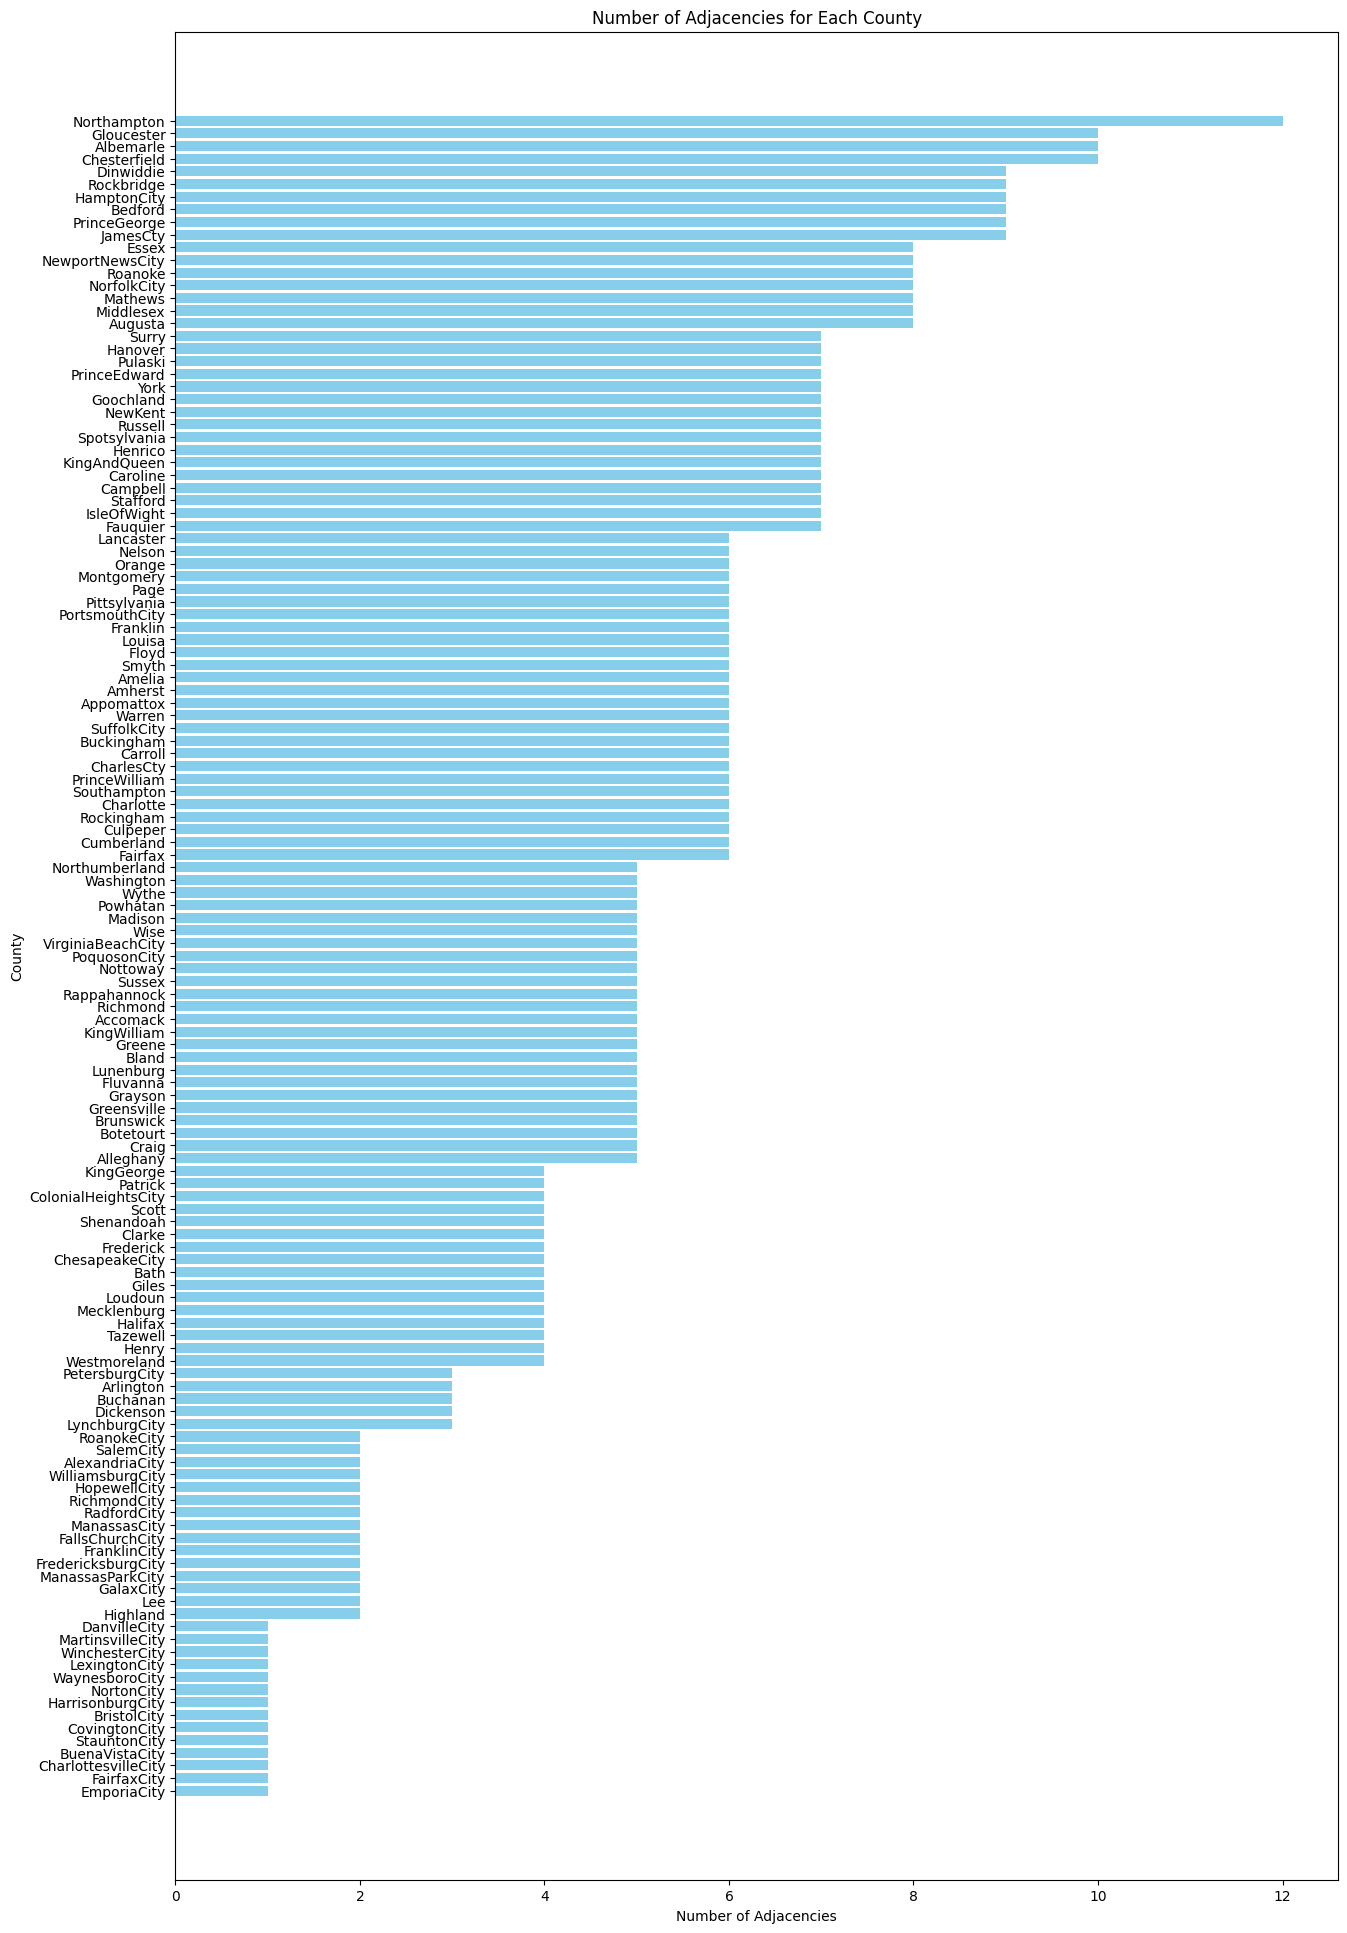

In [434]:
# Calculating adjacency count
adjacency_count = county_adjacencies.iloc[:, 4:].notna().sum(axis=1)
county_adjacencies['AdjacencyCount'] = adjacency_count

# Sorting the DataFrame by adjacency count
df_sorted = county_adjacencies.sort_values(by='AdjacencyCount', ascending=False)

plt.figure(figsize=(15, 24))
plt.barh(df_sorted['County'], df_sorted['AdjacencyCount'], color='skyblue')
plt.xlabel('Number of Adjacencies')
plt.ylabel('County')
plt.title('Number of Adjacencies for Each County')
plt.gca().invert_yaxis()
plt.show()

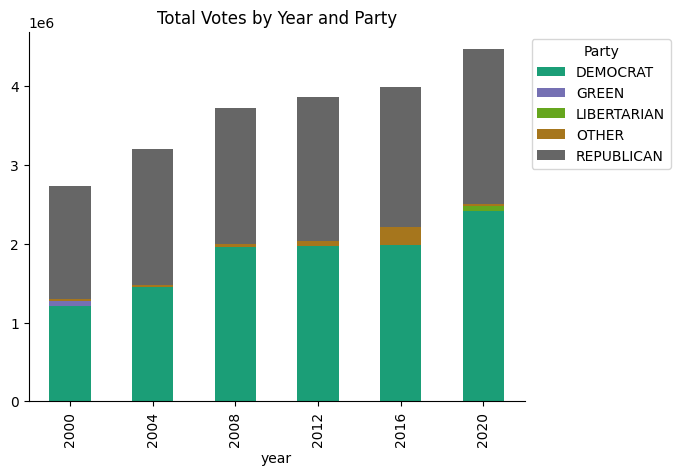

In [435]:
# Votes by Party
votes_year_party = cleaned_voting_VA.groupby(['year', 'party'])['candidatevotes'].sum().unstack()

# Plot
votes_year_party.plot(kind='bar', stacked=True, colormap='Dark2')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Total Votes by Year and Party')
plt.legend(title='Party', bbox_to_anchor=(1, 1))
plt.show()

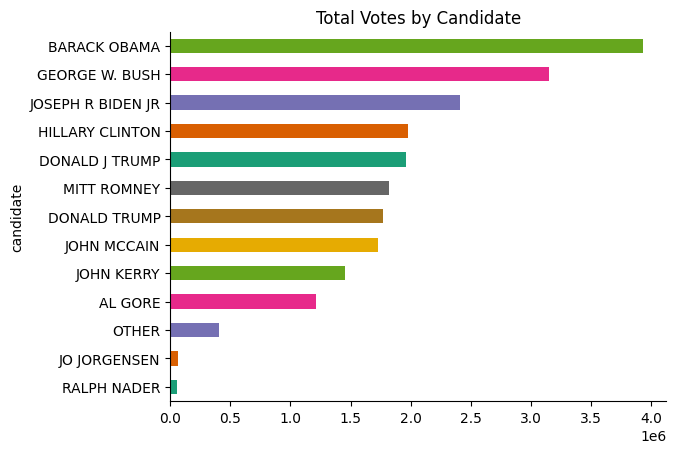

In [436]:
# Total Votes by Candidate
cleaned_voting_VA.groupby('candidate')['candidatevotes'].sum().sort_values().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Total Votes by Candidate')
plt.show()


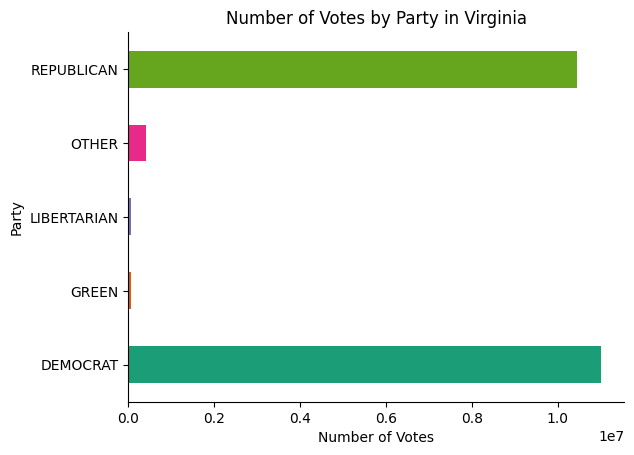

In [437]:
# Total Votes by Year and Party
votes_by_party = cleaned_voting_VA.groupby('party')['candidatevotes'].sum()

votes_by_party.plot(kind='barh', color=sns.palettes.color_palette('Dark2', len(votes_by_party)))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Number of Votes by Party in Virginia')
plt.xlabel('Number of Votes')
plt.ylabel('Party')
plt.show()

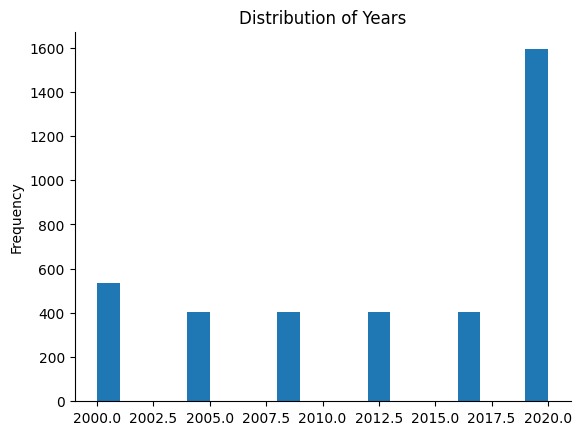

In [438]:
# Distribution of Votes Over the Years
cleaned_voting_VA['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Distribution of Years')
plt.show()

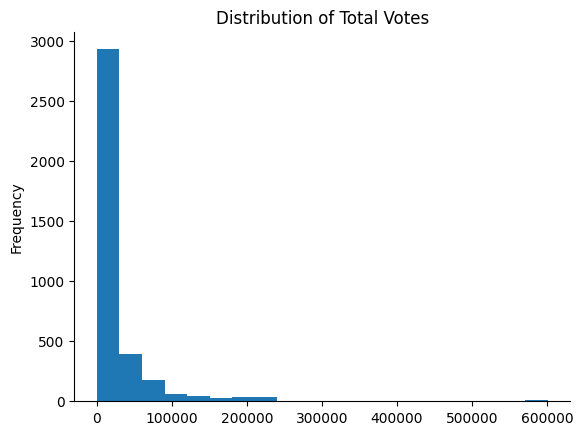

In [439]:
# Distribution of Total Votes
cleaned_voting_VA['totalvotes'].plot(kind='hist', bins=20, title='totalvotes')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Distribution of Total Votes')
plt.show()

In [440]:
voting_VA

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,71966,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,24,12113,20220315,ELECTION DAY
3732,71967,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,0,12113,20220315,PROVISIONAL
3733,71968,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2825,12113,20220315,ABSENTEE
3734,71969,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2370,12113,20220315,ELECTION DAY


In [441]:
voting_VA.loc[:,['party','totalvotes']].groupby('party').describe()

totalvotes                                                       \
                 count          mean           std     min     25%      50%   
party                                                                         
DEMOCRAT        1068.0  28918.409176  58126.380767     0.0  6741.5  11489.0   
GREEN            134.0  20432.201493  41840.513491  1437.0  5422.5   8762.5   
LIBERTARIAN      398.0  33633.665829  66258.561616  1533.0  7815.0  13487.0   
OTHER           1068.0  28918.409176  58126.380767     0.0  6741.5  11489.0   
REPUBLICAN      1068.0  28918.409176  58126.380767     0.0  6741.5  11489.0   

                                 
                  75%       max  
party                            
DEMOCRAT     24520.75  601243.0  
GREEN        19873.75  413775.0  
LIBERTARIAN  28693.00  601243.0  
OTHER        24520.75  601243.0  
REPUBLICAN   24520.75  601243.0

In [442]:
votes_year_party

party,DEMOCRAT,GREEN,LIBERTARIAN,OTHER,REPUBLICAN
year,,,,,
2000,1216422.0,59373.0,NaN,25243.0,1436877.0
2004,1454742.0,NaN,NaN,26666.0,1716959.0
2008,1959532.0,NaN,NaN,38723.0,1725005.0
2012,1971820.0,NaN,NaN,60147.0,1822522.0
2016,1981473.0,NaN,NaN,233715.0,1769443.0
2020,2413568.0,NaN,64761.0,21841.0,1962430.0


# EDA of county level data

In [443]:
frame1 = pd.read_csv('/content/project_voting/data/county_data/0002_ds176_20105_county_E.csv', encoding='ISO-8859-1')
frame2 = pd.read_csv('/content/project_voting/data/county_data/0002_ds191_20125_county_E.csv', encoding='ISO-8859-1')
frame3 = pd.read_csv('/content/project_voting/data/county_data/0002_ds225_20165_county_E.csv', encoding='ISO-8859-1')
frame4 = pd.read_csv('/content/project_voting/data/county_data/0002_ds249_20205_county_E.csv', encoding='ISO-8859-1')


<ipython-input-443-72e9ff82ba7b>:1: DtypeWarning: Columns (3,4,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267

For the purpose of simplicty, the counthy level data used will only track high level attributes of counties to make data. The 4 values are:
1. Population Size: The size and distribution of the population within a region can influence electoral outcomes. Size of populations may have diverse interests and concerns that can shape voting behavior (i.e. larger populations sway more left and smaller right)
2. Income per capita: Higher income levels may correlate with support for policies that promote economic growthand tax cuts, while lower income levels may correlate with support for social welfare programs or parties affiliated with policies attacking income inequality.
3. Education: For the purpose of this project, only Associates degrees and further were considered, while persons that merely attended college but did not obtain a degree were not. Higher education in regions may correlate with parties that prioritize education, innovation, research, etc.
4. Diversity: For the purpose of this project, % of population that is  white. More diverse populations typically refelct more forward thinking, but also result in a more diverse political opinion.

Additionally, only historical data from VA will be considered for the purpose of the project, which is aimed at prediciting voting turnout for VA counties.

In [444]:
#Converting columns to int and creating column that tracks % of population with at least an Associate Degree. This
# was the third value mentioned above. All other values are already within dataset. First frame1, 2006-2010.

frame1.iloc[1:, 137:142] = frame1.iloc[1:, 137:142].astype(int)
frame1['M_CollegeDegree'] = frame1.iloc[:, 137:142].sum(axis=1)

frame1.iloc[1:, 154:159] = frame1.iloc[1:, 154:159].astype(int)
frame1['F_CollegeDegree'] = frame1.iloc[:, 154:159].sum(axis=1)

frame1['JLZE001'] = frame1.iloc[1:,40:41].astype(int)
frame1['Percentage_Degree'] = (frame1['F_CollegeDegree'] + frame1['M_CollegeDegree']) / frame1['JLZE001']


In [445]:
#Creating the value to track % of popultion that is white
frame1['JMBE002'] = pd.to_numeric(frame1['JMBE002'], errors='coerce')
frame1['Percentage_White'] = (frame1['JMBE002']) / frame1['JLZE001']

In [446]:
#Renaming columns so that it is more interpretable
frame1.rename(columns={'JLZE001': 'Population', 'JQBE001': 'Income_Capita'}, inplace=True)

In [447]:
#Subsetting for just VA
fr1 = frame1[['YEAR', 'STATE', 'COUNTY', 'Population', 'Percentage_White', 'Income_Capita', 'Percentage_Degree']]
fr1=fr1[fr1['STATE']=='Virginia']
fr1

,YEAR,STATE,COUNTY,Population,Percentage_White,Income_Capita,Percentage_Degree
2821,2006-2010,Virginia,Accomack County,34066.0,0.664563,22766.0,0.167293
2822,2006-2010,Virginia,Albemarle County,96633.0,0.822628,36685.0,0.371716
2823,2006-2010,Virginia,Alleghany County,16406.0,0.929538,22013.0,0.17713
2824,2006-2010,Virginia,Amelia County,12517.0,0.737237,24197.0,0.125749
2825,2006-2010,Virginia,Amherst County,32315.0,0.766270,21097.0,0.15222
...,...,...,...,...,...,...,...
2950,2006-2010,Virginia,Suffolk City,82544.0,0.527319,28441.0,0.215982
2951,2006-2010,Virginia,Virginia Beach City,435996.0,0.694006,30873.0,0.268762
2952,2006-2010,Virginia,Waynesboro City,20885.0,0.831266,23190.0,0.182619
2953,2006-2010,Virginia,Williamsburg City,13421.0,0.761940,22851.0,0.237687


In [448]:
#Frame 2, 2008-2012

frame2.iloc[1:, 142:147] = frame2.iloc[1:, 142:147].astype(int)
frame2['CollegeDegree'] = frame2.iloc[:, 142:147].sum(axis=1)

frame2['QSEE001'] = frame2.iloc[1:,41:42].astype(int)
frame2['Percentage_Degree'] = (frame2['CollegeDegree']) / frame2['QSEE001']

In [449]:
frame2['QSQE002'] = pd.to_numeric(frame2['QSQE002'], errors='coerce')
frame2['Percentage_White'] = (frame2['QSQE002']) / frame2['QSEE001']

In [450]:
frame2.rename(columns={'QSEE001': 'Population', 'QWUE001': 'Income_Capita'}, inplace=True)

In [ ]:
fr2 = frame2[['YEAR', 'STATE', 'COUNTY', 'Population', 'Percentage_White', 'Income_Capita', 'Percentage_Degree']]
fr2=fr2[fr2['STATE']=='Virginia']
fr2

In [452]:
#Frame 3, 2012-2016

frame3.iloc[1:, 142:147] = frame3.iloc[1:, 142:147].astype(int)
frame3['CollegeDegree'] = frame3.iloc[:, 142:147].sum(axis=1)

frame3['AF2AE001'] = frame3.iloc[1:,41:42].astype(int)
frame3['Percentage_Degree'] = (frame3['CollegeDegree']) / frame3['AF2AE001']

In [453]:
frame3['AF2ME002'] = pd.to_numeric(frame3['AF2ME002'], errors='coerce')
frame3['Percentage_White'] = (frame3['AF2ME002']) / frame3['AF2AE001']

In [454]:
frame3.rename(columns={'AF2AE001': 'Population', 'AF6AE001': 'Income_Capita'}, inplace=True)

In [455]:
#Bedford city is absent in this data
fr3 = frame3[['YEAR', 'STATE', 'COUNTY', 'Population', 'Percentage_White', 'Income_Capita', 'Percentage_Degree']]
fr3=fr3[fr3['STATE']=='Virginia']
fr3

,YEAR,STATE,COUNTY,Population,Percentage_White,Income_Capita,Percentage_Degree
2821,2012-2016,Virginia,Accomack County,33060.0,0.676618,23337,0.175499
2822,2012-2016,Virginia,Albemarle County,104287.0,0.814627,38039,0.386875
2823,2012-2016,Virginia,Alleghany County,15919.0,0.926252,25220,0.182109
2824,2012-2016,Virginia,Amelia County,12793.0,0.733917,25335,0.141093
2825,2012-2016,Virginia,Amherst County,31999.0,0.769055,23372,0.192912
...,...,...,...,...,...,...,...
2949,2012-2016,Virginia,Suffolk city,87061.0,0.522783,30331,0.238672
2950,2012-2016,Virginia,Virginia Beach city,449733.0,0.676430,33250,0.29839
2951,2012-2016,Virginia,Waynesboro city,21366.0,0.818029,22967,0.201769
2952,2012-2016,Virginia,Williamsburg city,14988.0,0.747732,25548,0.309581


In [456]:
#Frame 4, 2016-2020

frame4.iloc[1:, 459:464] = frame4.iloc[1:, 459:464].astype(int)
frame4['CollegeDegree'] = frame4.iloc[:, 459:464].sum(axis=1)

frame4['AMPKE001'] = frame4.iloc[1:,41:42].astype(int)
frame4['Percentage_Degree'] = (frame4['CollegeDegree']) / frame4['AMPKE001']

In [457]:
frame4['AMPWE002'] = pd.to_numeric(frame4['AMPWE002'], errors='coerce')
frame4['Percentage_White'] = (frame4['AMPWE002']) / frame4['AMPKE001']

In [458]:
frame4.rename(columns={'AMPKE001': 'Population', 'AMTCE001': 'Income_Capita'}, inplace=True)

In [459]:
#Bedford city is absent in this data
fr4 = frame4[['YEAR', 'STATE', 'COUNTY', 'Population', 'Percentage_White', 'Income_Capita', 'Percentage_Degree', ]]
fr4=fr4[fr4['STATE']=='Virginia']
fr4

,YEAR,STATE,COUNTY,Population,Percentage_White,Income_Capita,Percentage_Degree
2822,2016-2020,Virginia,Accomack County,32560.0,0.668704,27012,0.20691
2823,2016-2020,Virginia,Albemarle County,108819.0,0.807497,46241,0.431708
2824,2016-2020,Virginia,Alleghany County,15030.0,0.926480,28048,0.180506
2825,2016-2020,Virginia,Amelia County,12970.0,0.754742,32799,0.174557
2826,2016-2020,Virginia,Amherst County,31782.0,0.765528,28866,0.225159
...,...,...,...,...,...,...,...
2950,2016-2020,Virginia,Suffolk city,91383.0,0.506112,38613,0.263036
2951,2016-2020,Virginia,Virginia Beach city,450882.0,0.650634,39788,0.332038
2952,2016-2020,Virginia,Waynesboro city,22300.0,0.802242,28287,0.25278
2953,2016-2020,Virginia,Williamsburg city,15034.0,0.716576,32878,0.297326


## Becasue there are 5 elections and 4 datasets of county level data, the 2000 election will not be used. Each county from each timeframe will be merged with the party they voted for in that election to then be used for predictive modeling.

1. Frame 1: 2006 - 2010 merged with 2008 results
2. Frame 2: 2008-2012 merged with 2012 results
3. Frame 3: 2012-2016 merged with 2016 results
4. Frame 4: 2016 -2020 merged with 2020 results

In [460]:
voting_VA

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,71966,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,24,12113,20220315,ELECTION DAY
3732,71967,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,0,12113,20220315,PROVISIONAL
3733,71968,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2825,12113,20220315,ABSENTEE
3734,71969,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2370,12113,20220315,ELECTION DAY


In [528]:
#Subsetting data by year first. Add county and city to end of names to match with the previous data sets.
#Split into dem and rep votes to see which party won election. First 2008 election

elec_2008=voting_VA[voting_VA['year']==2008]

for i, row in elec_2008.iterrows():
    if i < 1223:
        elec_2008.at[i, 'county_name'] += ' COUNTY'
    else:
        elec_2008.at[i, 'county_name'] += ' CITY'

dem_votes=elec_2008[elec_2008["party"]=="DEMOCRAT"]
dem_votes=dem_votes[['year','county_name', 'party','candidatevotes']]
dem_votes.rename(columns={'candidatevotes': 'Democratic', 'county_name':'COUNTY'}, inplace=True)

rep_votes=elec_2008[elec_2008["party"]=="REPUBLICAN"]
rep_votes=rep_votes[['county_name','party','candidatevotes']]
rep_votes.rename(columns={'candidatevotes': 'Republican', 'county_name':'COUNTY'}, inplace=True)

winner1 = pd.merge(dem_votes, rep_votes, on=['COUNTY'])
winner1

,year,COUNTY,party_x,Democratic,party_y,Republican
0,2008,ACCOMACK COUNTY,DEMOCRAT,7607,REPUBLICAN,7833
1,2008,ALBEMARLE COUNTY,DEMOCRAT,29792,REPUBLICAN,20576
2,2008,ALLEGHANY COUNTY,DEMOCRAT,3553,REPUBLICAN,3715
3,2008,AMELIA COUNTY,DEMOCRAT,2488,REPUBLICAN,3970
4,2008,AMHERST COUNTY,DEMOCRAT,6094,REPUBLICAN,8470
...,...,...,...,...,...,...
129,2008,SUFFOLK CITY,DEMOCRAT,22446,REPUBLICAN,17165
130,2008,VIRGINIA BEACH CITY,DEMOCRAT,98885,REPUBLICAN,100319
131,2008,WAYNESBORO CITY,DEMOCRAT,3906,REPUBLICAN,4815
132,2008,WILLIAMSBURG CITY,DEMOCRAT,4328,REPUBLICAN,2353


In [529]:
#Subset into county name and party winner
winner1['Winning_Party'] = winner1[['Democratic','Republican']].idxmax(axis=1)
winner1=winner1[['COUNTY','Winning_Party']]
winner1

,COUNTY,Winning_Party
0,ACCOMACK COUNTY,Republican
1,ALBEMARLE COUNTY,Democratic
2,ALLEGHANY COUNTY,Republican
3,AMELIA COUNTY,Republican
4,AMHERST COUNTY,Republican
...,...,...
129,SUFFOLK CITY,Democratic
130,VIRGINIA BEACH CITY,Republican
131,WAYNESBORO CITY,Republican
132,WILLIAMSBURG CITY,Democratic


In [530]:
#Merge with county level data from 2006-2010
fr1['COUNTY'] = fr1['COUNTY'].str.upper()
final1 = pd.merge(fr1, winner1, on=['COUNTY'])
final1

,YEAR,STATE,COUNTY,Population,Percentage_White,Income_Capita,Percentage_Degree,Winning_Party
0,2006-2010,Virginia,ACCOMACK COUNTY,34066.0,0.664563,22766.0,0.167293,Republican
1,2006-2010,Virginia,ALBEMARLE COUNTY,96633.0,0.822628,36685.0,0.371716,Democratic
2,2006-2010,Virginia,ALLEGHANY COUNTY,16406.0,0.929538,22013.0,0.17713,Republican
3,2006-2010,Virginia,AMELIA COUNTY,12517.0,0.737237,24197.0,0.125749,Republican
4,2006-2010,Virginia,AMHERST COUNTY,32315.0,0.766270,21097.0,0.15222,Republican
...,...,...,...,...,...,...,...,...
129,2006-2010,Virginia,SUFFOLK CITY,82544.0,0.527319,28441.0,0.215982,Democratic
130,2006-2010,Virginia,VIRGINIA BEACH CITY,435996.0,0.694006,30873.0,0.268762,Republican
131,2006-2010,Virginia,WAYNESBORO CITY,20885.0,0.831266,23190.0,0.182619,Republican
132,2006-2010,Virginia,WILLIAMSBURG CITY,13421.0,0.761940,22851.0,0.237687,Democratic


In [531]:
#2012 election
elec_2012=voting_VA[voting_VA['year']==2012]

for i, row in elec_2012.iterrows():
    if i < 1624:
        elec_2012.at[i, 'county_name'] += ' COUNTY'
    else:
        elec_2012.at[i, 'county_name'] += ' CITY'

dem_votes=elec_2012[elec_2012["party"]=="DEMOCRAT"]
dem_votes=dem_votes[['year','county_name', 'party','candidatevotes']]
dem_votes.rename(columns={'candidatevotes': 'Democratic', 'county_name':'COUNTY'}, inplace=True)

rep_votes=elec_2012[elec_2012["party"]=="REPUBLICAN"]
rep_votes=rep_votes[['county_name','party','candidatevotes']]
rep_votes.rename(columns={'candidatevotes': 'Republican', 'county_name':'COUNTY'}, inplace=True)

winner2 = pd.merge(dem_votes, rep_votes, on=['COUNTY'])
winner2

,year,COUNTY,party_x,Democratic,party_y,Republican
0,2012,ACCOMACK COUNTY,DEMOCRAT,7655,REPUBLICAN,8213
1,2012,ALBEMARLE COUNTY,DEMOCRAT,29757,REPUBLICAN,23297
2,2012,ALLEGHANY COUNTY,DEMOCRAT,3403,REPUBLICAN,3595
3,2012,AMELIA COUNTY,DEMOCRAT,2490,REPUBLICAN,4331
4,2012,AMHERST COUNTY,DEMOCRAT,5900,REPUBLICAN,8876
...,...,...,...,...,...,...
129,2012,SUFFOLK CITY,DEMOCRAT,24267,REPUBLICAN,17820
130,2012,VIRGINIA BEACH CITY,DEMOCRAT,94299,REPUBLICAN,99291
131,2012,WAYNESBORO CITY,DEMOCRAT,3840,REPUBLICAN,4790
132,2012,WILLIAMSBURG CITY,DEMOCRAT,4903,REPUBLICAN,2682


In [532]:
#Subset into county name and party winner
winner2['Winning_Party'] = winner2[['Democratic','Republican']].idxmax(axis=1)
winner2=winner2[['COUNTY','Winning_Party']]
winner2

,COUNTY,Winning_Party
0,ACCOMACK COUNTY,Republican
1,ALBEMARLE COUNTY,Democratic
2,ALLEGHANY COUNTY,Republican
3,AMELIA COUNTY,Republican
4,AMHERST COUNTY,Republican
...,...,...
129,SUFFOLK CITY,Democratic
130,VIRGINIA BEACH CITY,Republican
131,WAYNESBORO CITY,Republican
132,WILLIAMSBURG CITY,Democratic


In [533]:
#Merge with county level data from 2006-2010
fr2['COUNTY'] = fr2['COUNTY'].str.upper()
final2 = pd.merge(fr2, winner2, on=['COUNTY'])
final2

,YEAR,STATE,COUNTY,Population,Percentage_White,Income_Capita,Percentage_Degree,Winning_Party
0,2008-2012,Virginia,ACCOMACK COUNTY,33454.0,0.675136,22909,0.16844,Republican
1,2008-2012,Virginia,ALBEMARLE COUNTY,99484.0,0.818252,37837,0.382534,Democratic
2,2008-2012,Virginia,ALLEGHANY COUNTY,16297.0,0.933301,23680,0.181813,Republican
3,2008-2012,Virginia,AMELIA COUNTY,12674.0,0.727395,24548,0.15591,Republican
4,2008-2012,Virginia,AMHERST COUNTY,32301.0,0.762515,22169,0.166125,Republican
...,...,...,...,...,...,...,...,...
129,2008-2012,Virginia,SUFFOLK CITY,84216.0,0.524853,29547,0.222642,Democratic
130,2008-2012,Virginia,VIRGINIA BEACH CITY,439528.0,0.686762,31878,0.276494,Republican
131,2008-2012,Virginia,WAYNESBORO CITY,21030.0,0.819306,24826,0.18873,Republican
132,2008-2012,Virginia,WILLIAMSBURG CITY,14207.0,0.752868,23007,0.264517,Democratic


In [539]:
#2016 election
elec_2016=voting_VA[voting_VA['year']==2016]

for i, row in elec_2016.iterrows():
    if i < 2026:
        elec_2016.at[i, 'county_name'] += ' COUNTY'
    else:
        elec_2016.at[i, 'county_name'] += ' CITY'

dem_votes=elec_2016[elec_2016["party"]=="DEMOCRAT"]
dem_votes=dem_votes[['year','county_name', 'party','candidatevotes']]
dem_votes.rename(columns={'candidatevotes': 'Democratic', 'county_name':'COUNTY'}, inplace=True)

rep_votes=elec_2016[elec_2016["party"]=="REPUBLICAN"]
rep_votes=rep_votes[['county_name','party','candidatevotes']]
rep_votes.rename(columns={'candidatevotes': 'Republican', 'county_name':'COUNTY'}, inplace=True)

winner3 = pd.merge(dem_votes, rep_votes, on=['COUNTY'])
winner3

,year,COUNTY,party_x,Democratic,party_y,Republican
0,2016,ACCOMACK COUNTY,DEMOCRAT,6740,REPUBLICAN,8583
1,2016,ALBEMARLE COUNTY,DEMOCRAT,33345,REPUBLICAN,19259
2,2016,ALLEGHANY COUNTY,DEMOCRAT,2166,REPUBLICAN,4874
3,2016,AMELIA COUNTY,DEMOCRAT,2128,REPUBLICAN,4708
4,2016,AMHERST COUNTY,DEMOCRAT,5057,REPUBLICAN,9719
...,...,...,...,...,...,...
129,2016,SUFFOLK CITY,DEMOCRAT,23280,REPUBLICAN,18006
130,2016,VIRGINIA BEACH CITY,DEMOCRAT,91032,REPUBLICAN,98224
131,2016,WAYNESBORO CITY,DEMOCRAT,3764,REPUBLICAN,4801
132,2016,WILLIAMSBURG CITY,DEMOCRAT,5206,REPUBLICAN,1925


In [541]:
#Subset into county name and party winner
winner3['Winning_Party'] = winner2[['Democratic','Republican']].idxmax(axis=1)
winner3=winner3[['COUNTY','Winning_Party']]
winner3 = winner3[winner3['COUNTY'] != 'BEDFORD CITY']
winner3

<ipython-input-541-92bc79b8f0d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winner3['Winning_Party'] = winner2[['Democratic','Republican']].idxmax(axis=1)


,COUNTY,Winning_Party
0,ACCOMACK COUNTY,Republican
1,ALBEMARLE COUNTY,Democratic
2,ALLEGHANY COUNTY,Republican
3,AMELIA COUNTY,Republican
4,AMHERST COUNTY,Republican
...,...,...
129,SUFFOLK CITY,Democratic
130,VIRGINIA BEACH CITY,Republican
131,WAYNESBORO CITY,Republican
132,WILLIAMSBURG CITY,Democratic


In [542]:
#Merge with county level data from 2006-2010
fr3['COUNTY'] = fr3['COUNTY'].str.upper()
final3 = pd.merge(fr3, winner3, on=['COUNTY'])
final3

,YEAR,STATE,COUNTY,Population,Percentage_White,Income_Capita,Percentage_Degree,Winning_Party
0,2012-2016,Virginia,ACCOMACK COUNTY,33060.0,0.676618,23337,0.175499,Republican
1,2012-2016,Virginia,ALBEMARLE COUNTY,104287.0,0.814627,38039,0.386875,Democratic
2,2012-2016,Virginia,ALLEGHANY COUNTY,15919.0,0.926252,25220,0.182109,Republican
3,2012-2016,Virginia,AMELIA COUNTY,12793.0,0.733917,25335,0.141093,Republican
4,2012-2016,Virginia,AMHERST COUNTY,31999.0,0.769055,23372,0.192912,Republican
...,...,...,...,...,...,...,...,...
128,2012-2016,Virginia,SUFFOLK CITY,87061.0,0.522783,30331,0.238672,Democratic
129,2012-2016,Virginia,VIRGINIA BEACH CITY,449733.0,0.676430,33250,0.29839,Republican
130,2012-2016,Virginia,WAYNESBORO CITY,21366.0,0.818029,22967,0.201769,Republican
131,2012-2016,Virginia,WILLIAMSBURG CITY,14988.0,0.747732,25548,0.309581,Democratic


In [564]:
#2020 election. Extra cleaning taken to combine vote totals between absentee and in person ballots for a party
elec_2020=voting_VA[voting_VA['year']==2020]

for i, row in elec_2020.iterrows():
    if i < 3283:
        elec_2020.at[i, 'county_name'] += ' COUNTY'
    else:
        elec_2020.at[i, 'county_name'] += ''


dem_votes=elec_2020[elec_2020["party"]=="DEMOCRAT"]
dem_votes['party_votes'] = dem_votes.groupby('county_name')['candidatevotes'].transform('sum')
dem_votes=dem_votes[['year','county_name', 'party','party_votes']]
dem_votes.rename(columns={'party_votes': 'Democratic', 'county_name':'COUNTY'}, inplace=True)
dem_votes = dem_votes.drop_duplicates()


rep_votes=elec_2020[elec_2020["party"]=="REPUBLICAN"]
rep_votes['party_votes'] = rep_votes.groupby('county_name')['candidatevotes'].transform('sum')
rep_votes=rep_votes[['county_name','party','party_votes']]
rep_votes.rename(columns={'party_votes': 'Republican', 'county_name':'COUNTY'}, inplace=True)
rep_votes = rep_votes.drop_duplicates()

winner4 = pd.merge(dem_votes, rep_votes, on=['COUNTY'])
winner4

<ipython-input-564-7e0cca80e2b7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dem_votes['party_votes'] = dem_votes.groupby('county_name')['candidatevotes'].transform('sum')
<ipython-input-564-7e0cca80e2b7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rep_votes['party_votes'] = rep_votes.groupby('county_name')['candidatevotes'].transform('sum')


,year,COUNTY,party_x,Democratic,party_y,Republican
0,2020,ACCOMACK COUNTY,DEMOCRAT,7578,REPUBLICAN,9172
1,2020,ALBEMARLE COUNTY,DEMOCRAT,42466,REPUBLICAN,20804
2,2020,ALLEGHANY COUNTY,DEMOCRAT,2243,REPUBLICAN,5859
3,2020,AMELIA COUNTY,DEMOCRAT,2411,REPUBLICAN,5390
4,2020,AMHERST COUNTY,DEMOCRAT,5672,REPUBLICAN,11041
...,...,...,...,...,...,...
128,2020,SUFFOLK CITY,DEMOCRAT,28676,REPUBLICAN,20082
129,2020,VIRGINIA BEACH CITY,DEMOCRAT,117393,REPUBLICAN,105087
130,2020,WAYNESBORO CITY,DEMOCRAT,4961,REPUBLICAN,5507
131,2020,WILLIAMSBURG CITY,DEMOCRAT,4790,REPUBLICAN,1963


In [565]:
#Subset into county name and party winner
winner4['Winning_Party'] = winner2[['Democratic','Republican']].idxmax(axis=1)
winner4=winner3[['COUNTY','Winning_Party']]
winner4 = winner3[winner3['COUNTY'] != 'BEDFORD CITY']
winner4

,COUNTY,Winning_Party
0,ACCOMACK COUNTY,Republican
1,ALBEMARLE COUNTY,Democratic
2,ALLEGHANY COUNTY,Republican
3,AMELIA COUNTY,Republican
4,AMHERST COUNTY,Republican
...,...,...
129,SUFFOLK CITY,Democratic
130,VIRGINIA BEACH CITY,Republican
131,WAYNESBORO CITY,Republican
132,WILLIAMSBURG CITY,Democratic


In [566]:
#Merge with county level data from 2006-2010
fr4['COUNTY'] = fr4['COUNTY'].str.upper()
final4 = pd.merge(fr4, winner4, on=['COUNTY'])
final4

,YEAR,STATE,COUNTY,Population,Percentage_White,Income_Capita,Percentage_Degree,Winning_Party
0,2016-2020,Virginia,ACCOMACK COUNTY,32560.0,0.668704,27012,0.20691,Republican
1,2016-2020,Virginia,ALBEMARLE COUNTY,108819.0,0.807497,46241,0.431708,Democratic
2,2016-2020,Virginia,ALLEGHANY COUNTY,15030.0,0.926480,28048,0.180506,Republican
3,2016-2020,Virginia,AMELIA COUNTY,12970.0,0.754742,32799,0.174557,Republican
4,2016-2020,Virginia,AMHERST COUNTY,31782.0,0.765528,28866,0.225159,Republican
...,...,...,...,...,...,...,...,...
128,2016-2020,Virginia,SUFFOLK CITY,91383.0,0.506112,38613,0.263036,Democratic
129,2016-2020,Virginia,VIRGINIA BEACH CITY,450882.0,0.650634,39788,0.332038,Republican
130,2016-2020,Virginia,WAYNESBORO CITY,22300.0,0.802242,28287,0.25278,Republican
131,2016-2020,Virginia,WILLIAMSBURG CITY,15034.0,0.716576,32878,0.297326,Democratic


In [567]:
#Combine all of the data to complete the model ready data
model_data=pd.concat([final1,final2,final3,final4], ignore_index=True)
model_data

Because every VA county has either voted (D) or (R) since the 2008 election, only these 2 parties were looked at.
Data was merged with corresponidng county level data to attach a winning party to each county. All 4 timeframes of data were then concattatenated to create a dataset that can be train/test/split. This can then be used to confirm accuracy of model, with 4 separate election years of data available.

# End of EDA and Data Cleaning